# Atividade 2 - Perceptron Simples
#### Aluno: Patrick Motin Cruz
#### 27/10/2025

Implementação do Perceptron para entender como ele funciona com as portas lógicas que o professor mostrou em aulam, feitas em R (OR, AND e XOR) e ver o que acontece com os pesos e as fronteiras.

# Preparando o código

Primeiro vou importar as bibliotecas e criar as funções. 
- Uso numpy pros cálculos
- Matplotlib pra ver os gráficos
- Preciso de funções pra plotar os pontos e a linha de decisão

O professor disse que o perceptron tem que:
1. Inicializar os pesos aleatoriamente
2. Calcular a saída pra cada entrada
3. Ajustar os pesos quando errar
4. Repetir até acertar tudo ou cansar

Ler os arquivos CSV de 'datasets.zip'. Vou usar:
- pandas pra ler os dados
- uma função nova para carregar os dados, que possa ser utilizada independente da entrada, que:
  - lê o arquivo CSV da pasta datasets
  - separa as colunas X1 e X2 (entradas)
  - pega a coluna D (saída desejada)

### Plots dos dados

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Adicionar pandas pra ler os CSVs

# Mapeia classes para cores e marcadores diferentes (usado no pós-treinamento)
def _map_styles(labels):
    uniq = list(np.unique(labels))
    colors = ['b','r','g','m','c','y','k']
    markers = ['o','^','s','D','x','P','*']
    style = {}
    for idx, val in enumerate(uniq):
        c = colors[idx % len(colors)]
        m = markers[idx % len(markers)]
        style[val] = (c, m)
    return style

# Plot inicial: ainda não há classificação, então todos iguais (azul)
def plot_dados(X, D, titulo):
    plt.figure(figsize=(5,5))
    plt.plot(X[:,0], X[:,1], linestyle='None', marker='o', color='b', label='amostras')
    plt.grid(True)
    plt.title(titulo)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()

# Plot após treino: classes em cores/formas diferentes + fronteira

def plot_decisao(X, D, W, titulo):
    plt.figure(figsize=(5,5))
    styles = _map_styles(D)
    for val, (c, m) in styles.items():
        idx = np.where(D == val)[0]
        plt.plot(X[idx,0], X[idx,1], linestyle='None', marker=m, color=c, label=f'classe {val}')

    # Fronteira de decisão (só faz sentido para 2 classes)
    uniq = np.unique(D)
    if len(uniq) == 2:
        x1 = np.linspace(-0.5, 1.5, 100)
        if W[2] != 0:
            x2 = -(W[0] + W[1]*x1)/W[2]
            plt.plot(x1, x2, 'g-', label='fronteira')
        else:
            if W[1] != 0:
                xv = -W[0]/W[1]
                plt.axvline(x=xv, color='g', linestyle='-', label='fronteira')
    plt.grid(True)
    plt.title(titulo)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.axis([-0.5, 1.5, -0.5, 1.5])
    plt.legend()

# (resto da célula segue igual)


### Função principal para execução do código

#### Perceptron simples

In [43]:
def perceptron_simples(X, D, eta=0.1, max_epocas=1000):
    n_amostras, n_features = X.shape
    W = np.random.uniform(-0.5, 0.5, size=n_features + 1)

    # normaliza rótulos para {-1, 1} internamente
    D_pm1 = np.array(D, dtype=int)
    uniq = np.unique(D_pm1)
    if set(uniq) == {0, 1}:
        D_pm1 = np.where(D_pm1 == 0, -1, 1)

    epocas = 0
    erro = True
    while erro and epocas < max_epocas:
        erro = False
        for i in range(n_amostras):
            x = np.insert(X[i], 0, 1)
            v = np.dot(W, x)
            y = 1 if v >= 0 else -1
            if y != D_pm1[i]:
                W = W + eta * (D_pm1[i] - y) * x
                erro = True
        epocas += 1
    return W, epocas, not erro

##### Previsao

In [44]:
def prever_perceptron(W, X, saida_pm1=False):
    n_amostras = X.shape[0]
    Y = np.zeros(n_amostras, dtype=int)
    for i in range(n_amostras):
        x = np.insert(X[i], 0, 1)
        v = np.dot(W, x)
        if saida_pm1:
            Y[i] = 1 if v >= 0 else -1
        else:
            Y[i] = 1 if v >= 0 else 0
    return Y

#### Carregar dados CSC do diretorio datasets

In [45]:
def carregar_dados(arquivo):
    """Carrega dados CSV de datasets/<arquivo>.csv e retorna X (X1,X2) e D."""
    df = pd.read_csv(f"datasets/{arquivo}.csv")
    try:
        X = df[['X1', 'X2']].values
        D = df['D'].values
    except KeyError:
        # tenta com nomes em minúsculas
        X = df[['x1', 'x2']].values
        D = df['d'].values
    return X, D.astype(int)

# Testando com OR

Vou começar com o OR porque parece mais fácil


Quero ver:
- Como os pontos ficam no gráfico
- Se o perceptron aprende rápido
- Que linha ele vai desenhar pra separar os pontos

OBS: Vou usar triangulos vermelhos pra saída 0 e pontos azuis pra saída 1

Carregando dados do OR...
Formato dos dados: (4, 2)

Primeiras linhas dos dados:
X1  X2   D
0   0   -1
0   1   1
1   0   1
1   1   1

Resultados do treinamento:
Pesos finais: [-0.06037998  0.44375005  0.18292173]
Épocas necessárias: 3
Convergiu? True
Previsões: [-1  1  1  1]
Acurácia: 100.0%


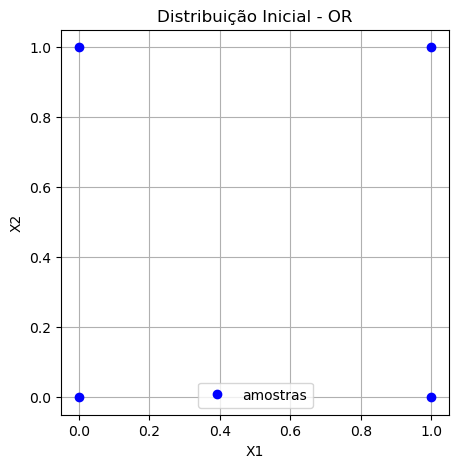

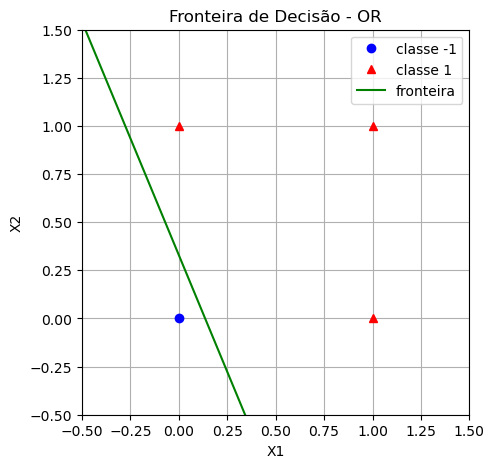

In [46]:
# Carregando dados do OR
print("Carregando dados do OR...")
X, D_OR = carregar_dados('or')
saida_pm1 = np.any(D_OR == -1)
print(f"Formato dos dados: {X.shape}")
print("\nPrimeiras linhas dos dados:")
print("X1  X2   D")
for i in range(len(X)):
    print(f"{X[i,0]}   {X[i,1]}   {D_OR[i]}")

# Visualização inicial
plot_dados(X, D_OR, 'Distribuição Inicial - OR')

# Treinamento
W, e, c = perceptron_simples(X, D_OR, eta=0.1, max_epocas=100)
Y_pred = prever_perceptron(W, X, saida_pm1=saida_pm1)
acc = (Y_pred == D_OR).mean()
print('\nResultados do treinamento:')
print('Pesos finais:', W)
print('Épocas necessárias:', e)
print('Convergiu?', c)
print('Previsões:', Y_pred)
print(f'Acurácia: {acc*100:.1f}%')

# Visualização da fronteira de decisão
plot_decisao(X, D_OR, W, 'Fronteira de Decisão - OR')

# Agora o AND

Vamos ver o AND agora

Diferente do OR, aqui só dá 1 quando as duas entradas são 1.
Vou usar os mesmos pontos do OR, só mudo a saída desejada.

Carregando dados do AND...
Formato dos dados: (4, 2)

Primeiras linhas dos dados:
X1  X2   D
0   0   -1
0   1   -1
1   0   -1
1   1   1

Resultados do treinamento:
Pesos finais: [-0.2598031   0.1753227   0.24957838]
Épocas necessárias: 3
Convergiu? True
Previsões: [-1 -1 -1  1]
Acurácia: 100.0%


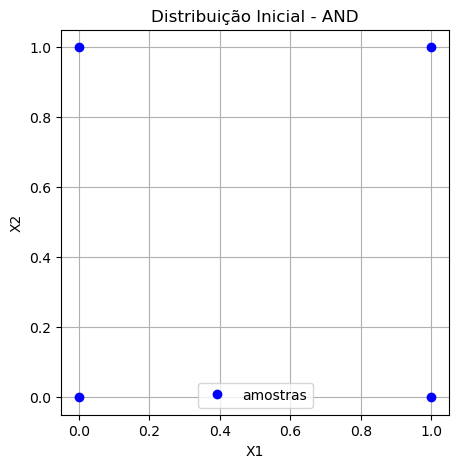

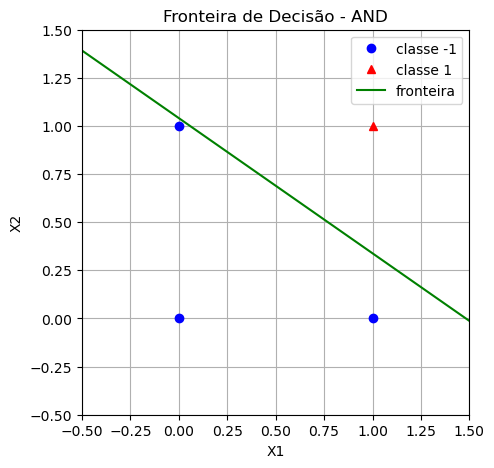

In [47]:
# Carregando dados do AND
print("Carregando dados do AND...")
X, D_AND = carregar_dados('and')
saida_pm1 = np.any(D_AND == -1)
print(f"Formato dos dados: {X.shape}")
print("\nPrimeiras linhas dos dados:")
print("X1  X2   D")
for i in range(len(X)):
    print(f"{X[i,0]}   {X[i,1]}   {D_AND[i]}")

# Visualização inicial
plot_dados(X, D_AND, 'Distribuição Inicial - AND')

# Treinamento
W, e, c = perceptron_simples(X, D_AND, eta=0.1, max_epocas=100)
Y_pred = prever_perceptron(W, X, saida_pm1=saida_pm1)
acc = (Y_pred == D_AND).mean()
print('\nResultados do treinamento:')
print('Pesos finais:', W)
print('Épocas necessárias:', e)
print('Convergiu?', c)
print('Previsões:', Y_pred)
print(f'Acurácia: {acc*100:.1f}%')

# Visualização da fronteira de decisão
plot_decisao(X, D_AND, W, 'Fronteira de Decisão - AND')

# 4. Experimento com Porta Lógica XOR

Agora vamos finalizar a última das portas lógicas antes de ir para Artificial e Iris dataset.

Quero observar:
1. A distribuição peculiar dos dados
2. A tentativa do Perceptron em encontrar uma fronteira
3. O comportamento da convergência

Carregando dados do XOR...
Formato dos dados: (4, 2)

Primeiras linhas dos dados:
X1  X2   D
0   0   -1
0   1   1
1   0   1
1   1   -1

Resultados do treinamento:
Pesos finais: [ 0.03180203 -0.36576847 -0.18961127]
Épocas necessárias: 100
Convergiu? False
Previsões: [ 1 -1 -1 -1]
Acurácia: 25.0%

OBS: Para XOR, é esperado que a acurácia não chegue a 100% (não é linearmente separável).


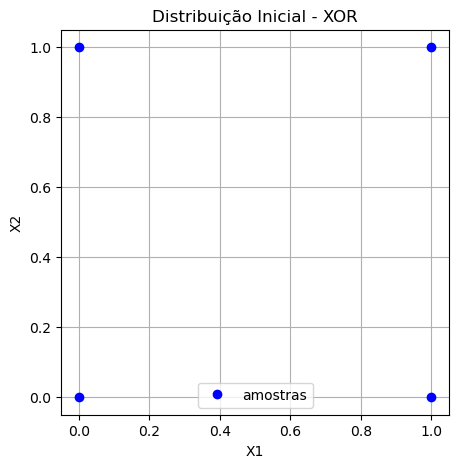

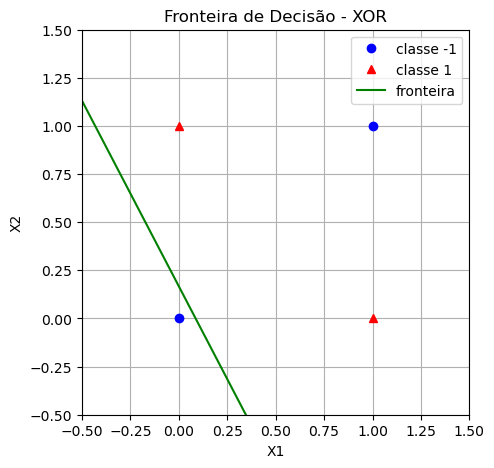

In [48]:
# Carregando dados do XOR
print("Carregando dados do XOR...")
X, D_XOR = carregar_dados('xor')
saida_pm1 = np.any(D_XOR == -1)
print(f"Formato dos dados: {X.shape}")
print("\nPrimeiras linhas dos dados:")
print("X1  X2   D")
for i in range(len(X)):
    print(f"{X[i,0]}   {X[i,1]}   {D_XOR[i]}")

# Visualização inicial
plot_dados(X, D_XOR, 'Distribuição Inicial - XOR')

# Treinamento
W, e, c = perceptron_simples(X, D_XOR, eta=0.1, max_epocas=100)
Y_pred = prever_perceptron(W, X, saida_pm1=saida_pm1)
acc = (Y_pred == D_XOR).mean()
print('\nResultados do treinamento:')
print('Pesos finais:', W)
print('Épocas necessárias:', e)
print('Convergiu?', c)
print('Previsões:', Y_pred)
print(f'Acurácia: {acc*100:.1f}%')

# Visualização da fronteira de decisão
plot_decisao(X, D_XOR, W, 'Fronteira de Decisão - XOR')

print('\nOBS: Para XOR, é esperado que a acurácia não chegue a 100% (não é linearmente separável).')

### Resultado

Interpretação rápida:
- XOR não é linearmente separável; um Perceptron de camada única não consegue encontrar uma única linha que separe corretamente as classes.
- Por isso, mesmo após o limite de 100 épocas, o algoritmo não converge e a acurácia permanece baixa.